## 实盘基准
61% 中债新综合指数，财富总值

13% NDX

13% SPY

13% 中证红利指数

In [1]:
import akshare as ak
import pandas as pd
import numpy as np
from datetime import datetime
import pyfolio as pf
import quantstats as qs

D:\Anaconda\lib\site-packages\akshare\__init__.py:2901: UserWarning: 为了支持更多特性，请将 Pandas 升级到 2.2.0 及以上版本！
  warnings.warn(
D:\Anaconda\lib\site-packages\pyfolio\pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
df_bond = ak.bond_new_composite_index_cbond(indicator="财富", period="总值")
df_ndx = ak.index_us_stock_sina(symbol=".NDX")
df_inx = ak.index_us_stock_sina(symbol=".INX")
df_china_dividends = ak.stock_zh_index_daily_em(symbol="sh000922")

In [3]:
df_bond = df_bond.rename(columns={'value':"中债"})[['date','中债']]
df_ndx = df_ndx[['date','close']].rename(columns={'close':"ndx_close"})
df_inx = df_inx[['date','close']].rename(columns={'close':"inx_close"})
df_china_dividends = df_china_dividends[['date','close']].rename(columns={'close':"中证红利_close"})

In [4]:
df_temp1 = pd.merge(df_bond,df_ndx,on='date',how='inner')
df_temp1 = pd.merge(df_temp1,df_inx,on='date',how='inner')
df_temp1['date'] = pd.to_datetime(df_temp1['date'])
df_china_dividends['date'] = pd.to_datetime(df_china_dividends['date'])
df_temp1 = pd.merge(df_temp1,df_china_dividends,on='date',how='inner')

In [5]:
df_merged = df_temp1
df_merged = df_merged.set_index('date')
df_merged = df_merged.pct_change()
df_merged.dropna(inplace=True)
# df_merged = df_merged.applymap(lambda x: f'{x:.2%}')
df_merged 

,中债,ndx_close,inx_close,中证红利_close
date,,,,
2014-02-19,0.000224,-0.007227,-0.006524,0.006535
2014-02-20,0.000658,0.005226,0.006031,-0.003175
2014-02-21,0.001026,-0.002541,-0.001919,-0.012372
2014-02-24,0.001951,0.006337,0.006187,-0.012651
2014-02-25,0.002704,-0.001810,-0.001348,-0.027965
...,...,...,...,...
2024-11-25,0.001155,0.001380,0.003020,0.001559
2024-11-26,0.000587,0.005672,0.005722,0.000380
2024-11-27,0.000438,-0.008527,-0.003801,0.010859


In [6]:
proportion={
    '中债':0.61,
    'ndx_close':0.13,
    'inx_close':0.13,
    '中证红利_close':0.13
}
df_merged['benchmark'] = df_merged.mul(proportion,axis=1).sum(axis=1)

Start date,2014-02-19
End date,2024-12-02
Total months,120
,Backtest
Annual return,9.062%
Cumulative returns,139.658%
Annual volatility,6.079%
Sharpe ratio,1.46
Calmar ratio,0.95
Stability,0.98
Max drawdown,-9.522%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,8.91,2020-02-19,2020-03-20,2020-06-05,78
1,7.26,2015-06-12,2015-08-24,2016-07-18,287
2,6.06,2022-01-04,2022-06-15,2023-05-05,349
3,4.58,2018-09-28,2018-12-21,2019-02-11,97
4,3.47,2018-01-26,2018-02-08,2018-06-05,93


D:\Anaconda\lib\site-packages\pyfolio\timeseries.py:1236: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  period = returns_dupe.loc[start:end]


Stress Events,mean,min,max
Apr14,0.03%,-0.50%,0.50%
Oct14,0.12%,-0.54%,0.73%
Fall2015,-0.16%,-2.08%,1.34%
New Normal,0.04%,-2.08%,1.64%
Covid,0.03%,-3.53%,2.59%


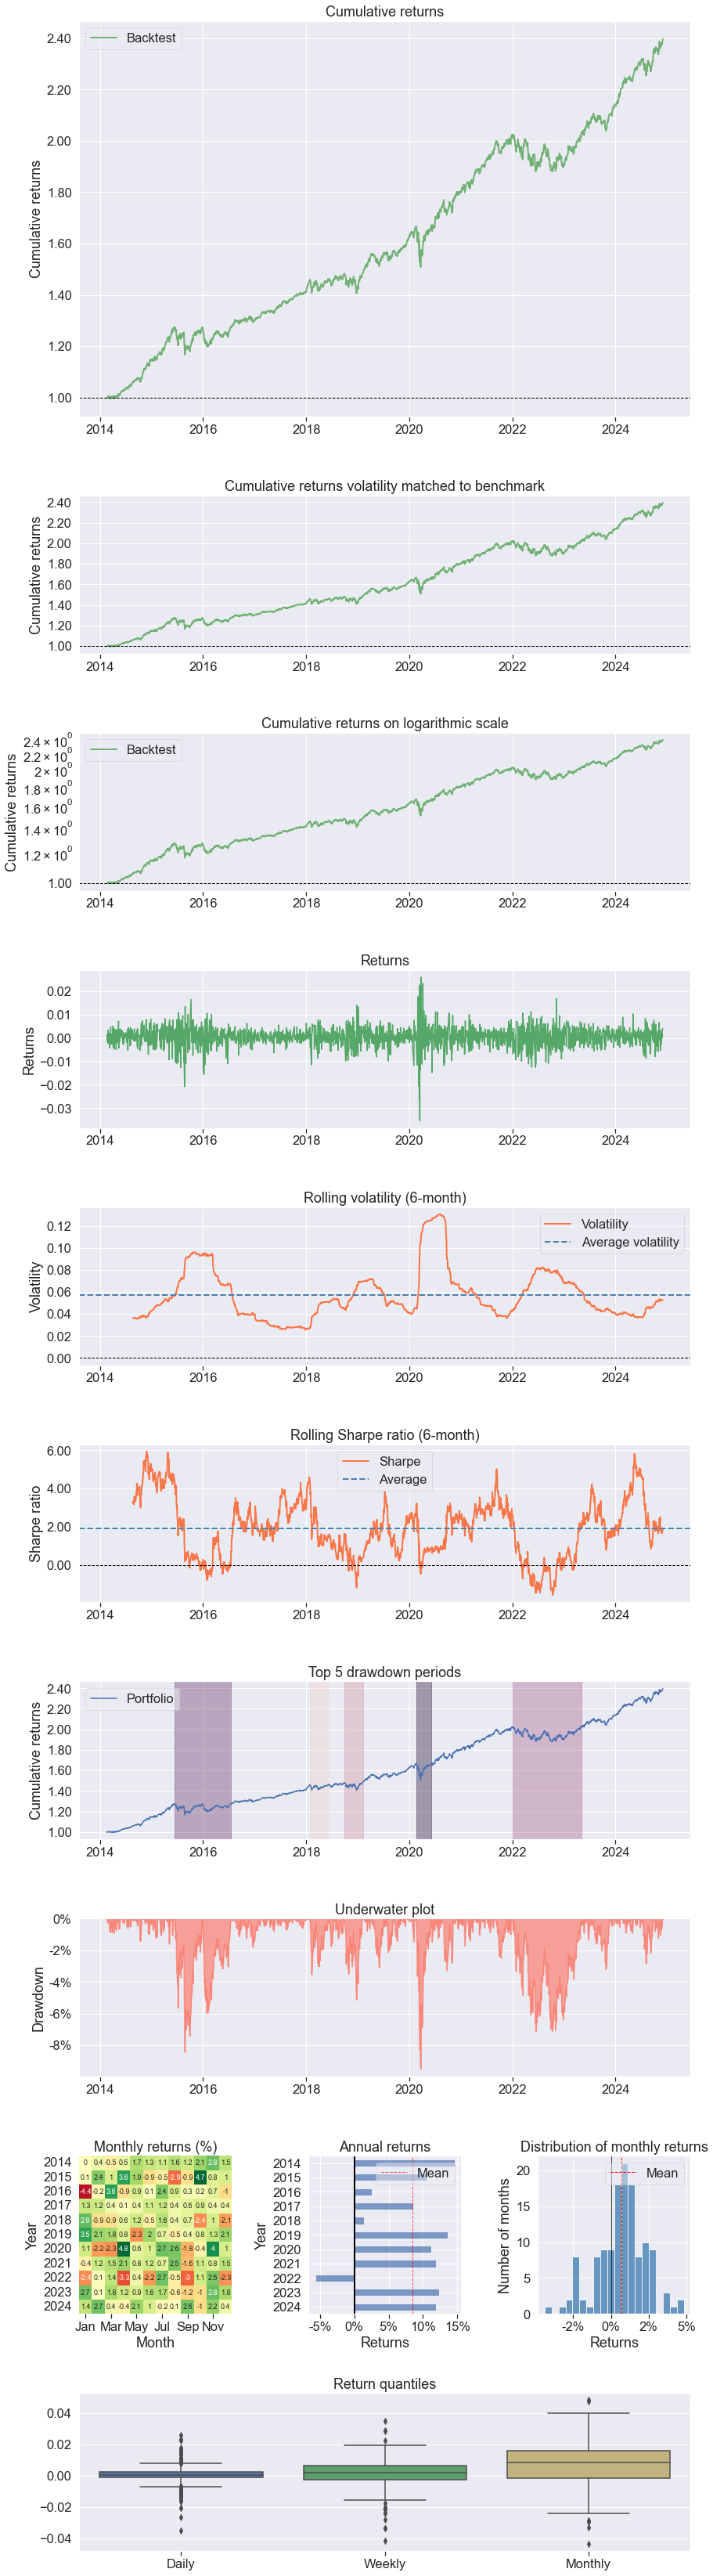

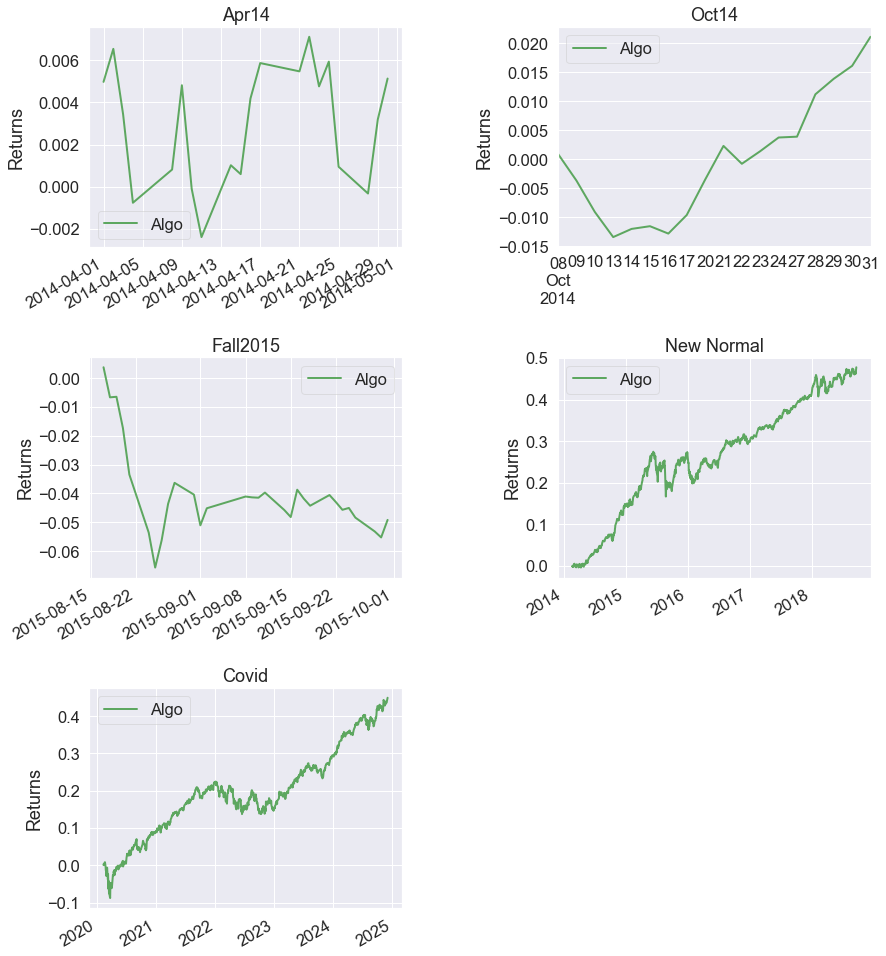

In [7]:
pf.create_full_tear_sheet(df_merged['benchmark'])

In [9]:
df_merged['benchmark'].resample('W-FRI').apply(lambda x: (1 + x).prod() - 1).to_excel(r'20241130_weekly_returns.xlsx')

In [10]:
df_merged['benchmark'].resample('A-DEC').apply(lambda x: (1 + x).prod() - 1)

date
2014-12-31    0.145648
2015-12-31    0.105455
2016-12-31    0.024872
2017-12-31    0.085974
2018-12-31    0.014410
2019-12-31    0.135551
2020-12-31    0.112310
2021-12-31    0.118702
2022-12-31   -0.056658
2023-12-31    0.123818
2024-12-31    0.118886
Freq: A-DEC, Name: benchmark, dtype: float64

In [11]:
qs.reports.html(df_merged['benchmark'])

In [22]:
qs.reports.html?

In [12]:
qs.stats.cagr(df_merged['benchmark'])

0.0575105017556079

In [13]:
df_merged['benchmark']

date
2014-02-19   -0.000802
2014-02-20    0.001452
2014-02-21   -0.001562
2014-02-24    0.001174
2014-02-25   -0.002396
                ...   
2024-11-25    0.001479
2024-11-26    0.001888
2024-11-27    0.000076
2024-11-29    0.003321
2024-12-02    0.004062
Name: benchmark, Length: 2539, dtype: float64

In [35]:
returns=df_merged['benchmark']
cagr = qs.stats.cagr(returns,periods=360)
var = qs.stats.volatility(returns,periods=360,annualize=True)
max_drawdown = qs.stats.max_drawdown(returns)
calmar = qs.stats.calmar(returns)
sortino = qs.stats.sortino(returns)


In [37]:
qs.stats.alpha_beta(returns)

AttributeError: module 'quantstats.stats' has no attribute 'alpha_beta'

In [27]:
qs.stats.volatility(df_merged['benchmark'], periods=360, annualize=True)

0.07265786586196599

In [25]:
qs.stats.max_drawdown?

In [24]:
qs.stats.sharpe(df_merged['benchmark'])

1.4577101412820526